### Exploratory Data Analysis
### Data Pre-Processing

In [56]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [57]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [58]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)




*   In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.
*   Date is also not useful because we already have season column which is also almost equal to date.



*   City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.
*   'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.





In [59]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [60]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [61]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [62]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [63]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [64]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [65]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64




*   Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.
*   Filling player_dismissed null values with 'No wicket', dismissal_Kind null values with also No Wicket.



In [66]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [67]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000




*   I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.
*   In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.


*   And in remaining columns max value is in certain limit only. So i can say there are not much outliers.






In [68]:
#Merging both datasets

df_total = pd.merge(df_matches, df_deliveries, how= 'outer', left_on='id',right_on='match_id')

### Q1) Who will win the match SRH VS RCB?

In [86]:
# Lets check winning ratio between RCB VS SRH
df_RCB_SRH = df_matches[((df_matches['team1'] == 'Royal Challengers Bangalore') | (df_matches['team1'] == 'Sunrisers Hyderabad')) & 
                        ((df_matches['team2'] == 'Royal Challengers Bangalore') | (df_matches['team2'] == 'Sunrisers Hyderabad'))] 

#plotting RCB and SRH wins against each other
import plotly.graph_objs as go
df_winner = df_RCB_SRH[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by SRH and RCB against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show() 

SRH won 8 matches and RCB won 6 matches out of 14 head-head matches.

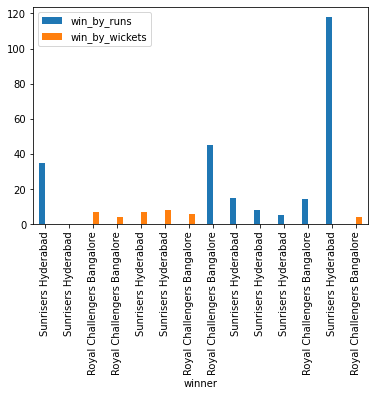

In [91]:
#Lets look at how each tean won the matches 
import matplotlib.pyplot as plt
df_RCB_SRH = df_RCB_SRH[['win_by_runs','win_by_wickets','winner']]
df_RCB_SRH.plot( "winner", kind="bar")

**Conclusion :-**



*   From above bar plot one thing i observed clearly is that SRH won most of the matches by batting first. Because whenever they won the match against RCB they won it by runs not by wickets mostly.
*   In one match they almost won it by 120 runs. That tells you that SRH will defend the targets very well. But RCB won matches when they are chasing mostly.


*   One match went to superover and SRH won that match i.e why in above plot for one of the matches it showing nothing.




So today match is about best chasing team(RCB) vs best defending team(SRH)

According to above all observations i am predicting SRH will win today match.



### Q2) How many runs will be scored totally in the match? 

The match is happening at Sharjah Cricket ground. Number of runs scored in the match sometimes depends on Pitch as well. 

So i am looking at runs scored in sharjah by every team not only SRH and RCB because we have very less data about sharjah.

In [69]:
# Now i am filtering Sharjah from city column
df_sharjah = df_total[(df_total['city'] == 'Sharjah')]

df_runs_sharjah = df_sharjah.groupby('match_id',as_index=False)['total_runs'].sum()

print("Number of matches played at sharjah",df_runs_sharjah.shape[0], '\n')
print("Average runs scored at sharjah",round(df_runs_sharjah['total_runs'].mean(),2))

Number of matches played at sharjah 6 

Average runs scored at sharjah 304.83


Only we have 6 matches data related to sharjah that to from 2014 season. So we cant decide only with above analysis.

We have to take SRH vs RCB matches data also in all grounds.

In [82]:
df_SRHvsRCB = df_total[((df_total['batting_team'] == 'Sunrisers Hyderabad') & (df_total['bowling_team'] == 'Royal Challengers Bangalore')) |
                       ((df_total['batting_team'] == 'Royal Challengers Bangalore') & (df_total['bowling_team'] == 'Sunrisers Hyderabad')) ]
                       

df_SRHvsRCB.head(2)

df_runs = df_SRHvsRCB.groupby('match_id',as_index=False)['total_runs'].sum()


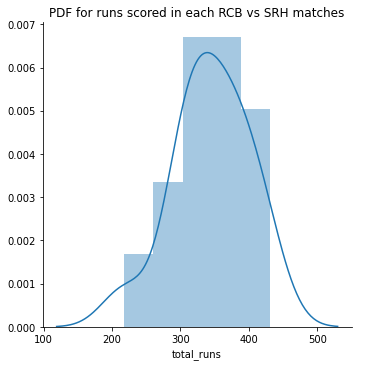

In [71]:
#Now plotting PDF 
import seaborn as sns

sns.FacetGrid(df_runs,size=5) \
   .map(sns.distplot, "total_runs") \
   .add_legend();

plt.title("PDF for runs scored in each RCB vs SRH matches")
plt.show();

**Conclusion :-**

The probability is very high between 340 to 380 runs. So i am predicting in today match they will score more than 360 runs.

### Q3) How many balls more/less will RCB to take to reach a score total of 30 runs after they reach a team total of 50 as compared to SRH?

In [72]:
#First i am taking SRH vs RCB matches.
#Than calculating Number of balls take to reach 30 runs after they reach 50 runs in each match by both teams.
#Now i am filtering SRH batting against RCB.
df_SRHbatting = df_deliveries[(df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Royal Challengers Bangalore')]
                          
#converting total_runs,match id, wide_runs and no-balls into list
total_runs_list = df_SRHbatting['total_runs'].tolist()
match_id_list = df_SRHbatting['match_id'].tolist()
wideballs_list = df_SRHbatting['wide_runs'].tolist()
noballs_list = df_SRHbatting['noball_runs'].tolist()

listoflists = []
listoflists.append(match_id_list)
listoflists.append(total_runs_list)
listoflists.append(wideballs_list)
listoflists.append(noballs_list)

SRH_ballsfaced = []
SRH_matchID = []
run = 0
balls_faced = 0
for i in range(len(listoflists[0])-1):
     run = run + (listoflists[1][i])
     if run >= 50:
        run = 0
     if listoflists[2][i] == 0 and listoflists[3][i] == 0 : #only including valid deliveries in balls_faced not wides, no-balls
        balls_faced = balls_faced + 1
     if listoflists[0][i] != listoflists[0][i+1] and listoflists[0][i] not in SRH_matchID and run<30:
        SRH_ballsfaced.append('NA')  #here 'NA' means SRH didnt scored less than 80 runs(50 + 30) in a match.
        SRH_matchID.append(listoflists[0][i])
        balls_faced = 0
        run = 0
     if listoflists[0][i] != listoflists[0][i+1]:
        balls_faced = 0
        run = 0 
     if listoflists[0][i] not in SRH_matchID:   
        if run >= 30:
           SRH_ballsfaced.append(balls_faced)
           SRH_matchID.append(listoflists[0][i])
           run = 0
           balls_faced = 0

print("Balls faced to reach 30 runs after scoring 50 runs by SRH:",SRH_ballsfaced,'\n')
print("Corresponding Match_Id             :",SRH_matchID)

Balls faced to reach 30 runs after scoring 50 runs by SRH: [20, 29, 27, 25, 19, 11, 21, 18, 26, 25, 25, 21, 17, 19] 

Corresponding Match_Id             : [1, 388, 432, 481, 503, 525, 568, 580, 603, 636, 7932, 7944, 11147, 11345]


In [73]:
#Now i am filtering RCB batting against SRH.
df_RCBbatting = df_deliveries[(df_deliveries['batting_team'] == 'Royal Challengers Bangalore') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad')]
                          
#converting total_runs,match id, wide_runs and no-balls into list
total_runs_list = df_RCBbatting['total_runs'].tolist()
match_id_list = df_RCBbatting['match_id'].tolist()
wideballs_list = df_RCBbatting['wide_runs'].tolist()
noballs_list = df_RCBbatting['noball_runs'].tolist()

listoflists = []
listoflists.append(match_id_list)
listoflists.append(total_runs_list)
listoflists.append(wideballs_list)
listoflists.append(noballs_list)

RCB_ballsfaced = []
RCB_matchID = []
run = 0
balls_faced = 0
for i in range(len(listoflists[0])-1):
     run = run + (listoflists[1][i])
     if run >= 50:
        run = 0
     if listoflists[2][i] == 0 and listoflists[3][i] == 0 : #only including valid deliveries in balls_faced not wides, no-balls
        balls_faced = balls_faced + 1
     if listoflists[0][i] != listoflists[0][i+1] and listoflists[0][i] not in RCB_matchID and run<30:
        RCB_ballsfaced.append('NA')  #here 'NA' means RCB didnt scored 75 runs in a match.
        RCB_matchID.append(listoflists[0][i])
        balls_faced = 0
        run = 0
     if listoflists[0][i] != listoflists[0][i+1]:
        balls_faced = 0
        run = 0 
     if listoflists[0][i] not in RCB_matchID:   
        if run >= 30:
           RCB_ballsfaced.append(balls_faced)
           RCB_matchID.append(listoflists[0][i])
           run = 0
           balls_faced = 0

print("Balls faced to reach 30 runs after scoring 50 runs by RCB:",RCB_ballsfaced,'\n')
print("Corresponding Match_Id             :",RCB_matchID)

Balls faced to reach 30 runs after scoring 50 runs by RCB: [20, 28, 26, 30, 44, 25, 10, 25, 19, 20, 20, 19, 32, 21] 

Corresponding Match_Id             : [1, 388, 432, 481, 503, 525, 568, 580, 603, 636, 7932, 7944, 11147, 11345]


one thing we can observe is that from both teams balls_faced list they scored atleast 80 runs(50+30) in each match and in each innings.

In [74]:
#converting above lists into dataframes 
df_SRH_ballsfaced =  pd.DataFrame(list(zip(SRH_matchID, SRH_ballsfaced)), columns =['match_id', 'balls_faced_SRH']) 
df_RCB_ballsfaced =  pd.DataFrame(list(zip(RCB_matchID, RCB_ballsfaced)), columns =['match_id', 'balls_faced_RCB']) 

#Merging SRH and RCB ballsfaced dataframes on match_id
df_SRHvsRCB = pd.merge(df_SRH_ballsfaced, df_RCB_ballsfaced, left_on='match_id',right_on='match_id', how='outer')

#Now subtracting both teams balls faced list
df_SRHvsRCB['difference_in_balls'] = abs(df_SRHvsRCB['balls_faced_SRH'] - df_SRHvsRCB['balls_faced_RCB'])
df_SRHvsRCB.head(3)

,match_id,balls_faced_SRH,balls_faced_RCB,difference_in_balls
0,1,20,20,0
1,388,29,28,1
2,432,27,26,1


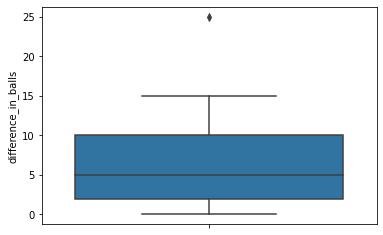

In [75]:
ax = sns.boxplot(y="difference_in_balls", data=df_SRHvsRCB)

**Conclusion :-**



*   By looking at above boxplot i can say that 75% of values(3rd quartile) are less than 10 balls. 2nd quartile(median) is 5 balls. In only one match the balls difference is greater than 24.
*   So according to above plot i am predicting in today match balls difference will be in the range of (0-8).



### Q4) How many wickets more/less will SRH loose as compared to RCB in the Powerplay?

In [76]:
#First filtering SRH vs RCB matches
df_SRHRCB = df_deliveries[((df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Royal Challengers Bangalore')) |
                         ((df_deliveries['batting_team'] == 'Royal Challengers Bangalore') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad'))] 

#Calcualting SRH wickets in first 6 overs in every match against RCB.
df_SRH_powerplay = df_SRHRCB[(df_SRHRCB['bowling_team'] == 'Sunrisers Hyderabad') & (df_SRHRCB['over'] <= 6) &
                             (df_SRHRCB['player_dismissed'] != 'No Wicket')]
wickets_taken_powerplay = df_SRH_powerplay.groupby('match_id')['player_dismissed'].count()
df_wickets_PP_SRH = wickets_taken_powerplay.to_frame().reset_index()
df_wickets_PP_SRH.rename(columns = {'player_dismissed':'wickets_taken_poweplay_SRH'}, inplace=True)
df_wickets_PP_SRH.head(2)

,match_id,wickets_taken_poweplay_SRH
0,1,1
1,388,2


In [77]:
#Calcualting RCB wickets in first 6 overs in every match against RCB.
df_RCB_powerplay = df_SRHRCB[(df_SRHRCB['bowling_team'] == 'Royal Challengers Bangalore') & (df_SRHRCB['over'] <= 6) &
                             (df_SRHRCB['player_dismissed'] != 'No Wicket')]

wickets_taken_powerplay = df_RCB_powerplay.groupby('match_id')['player_dismissed'].count()
df_wickets_PP_RCB = wickets_taken_powerplay.to_frame().reset_index()
df_wickets_PP_RCB.rename(columns = {'player_dismissed':'wickets_taken_poweplay_RCB'}, inplace=True)
df_wickets_PP_RCB.head(2)

,match_id,wickets_taken_poweplay_RCB
0,1,1
1,388,2


In some matches RCB or SRH is not taken any wickets in Powerplay.

So in those matches null value is passing. I am replacung that null value with 0 wickets. 

In [78]:
#Joining above two dataframes by match_id
df_SRHRCB_powerplay = pd.merge(df_wickets_PP_SRH, df_wickets_PP_RCB, left_on='match_id',right_on='match_id', how='outer')
df_SRHRCB_powerplay["wickets_taken_poweplay_SRH"].fillna(0, inplace = True)
df_SRHRCB_powerplay['wickets_taken_poweplay_RCB'].fillna(0, inplace = True)

#Taking difference in runs for each match in Powerplay(PP)
df_SRHRCB_powerplay['difference_in_wickets'] = abs(df_SRHRCB_powerplay['wickets_taken_poweplay_SRH'] - df_SRHRCB_powerplay['wickets_taken_poweplay_RCB'])
df_SRHRCB_powerplay.head(5)


,match_id,wickets_taken_poweplay_SRH,wickets_taken_poweplay_RCB,difference_in_wickets
0,1,1,1.0,0.0
1,388,2,2.0,0.0
2,432,1,1.0,0.0
3,481,2,2.0,0.0
4,503,2,0.0,2.0


In [79]:
print(df_SRHRCB_powerplay['difference_in_wickets'].describe())

count    13.000000
mean      1.000000
std       1.154701
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: difference_in_wickets, dtype: float64


**Conclusion :-**



*   Mean and median of wickets difference is equal to 1 and 75% of the values are less than 2.
*   So according to above observation i am going with wickets difference in POwerplay in the range of (0-1).



### Q5) How many dot balls will be bowled in the entire match?

In [83]:
# Calculating dot balls in each RCB vs SRH match
df_dotball = df_SRHvsRCB[df_SRHvsRCB['total_runs'] == 0]
df_dotball =  df_dotball.groupby('match_id')['total_runs'].count()
df_dotball =  df_dotball.to_frame().reset_index()
df_dotball.rename(columns = {'total_runs':'dot_balls'}, inplace = True)
df_dotball.head() 

,match_id,dot_balls
0,1,70
1,388,87
2,432,81
3,481,104
4,503,86


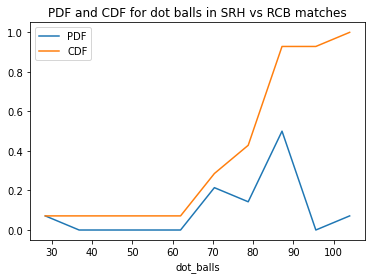

count     14.000000
mean      75.928571
std       18.878006
min       20.000000
25%       70.500000
50%       80.500000
75%       85.750000
max      104.000000
Name: dot_balls, dtype: float64


In [84]:
import numpy as np
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_dotball['dot_balls'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("PDF and CDF for dot balls in SRH vs RCB matches")
plt.xlabel('dot_balls')
plt.legend(leg)
plt.show();

print(df_dotball['dot_balls'].describe())

**Conclusion :-**



*   By looking at CDF plot i can say from till 60 balls the percentage is very less but from 60 - 80 the dot balls percentage increased very highly.
*   In 75% of matches dot balls will be less than 85 and median is 80.

So i am predicting in today match also dot balls will be bowled in the range of (60-80)

